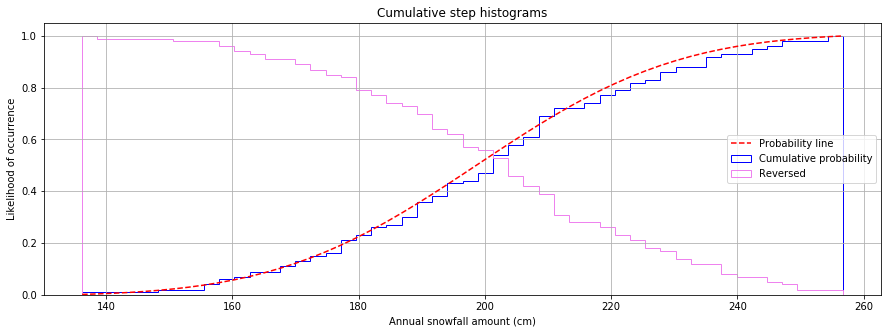

In [1]:
# サンプル4-33-1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 平均、標準偏差、ビンの数
mu = 200
sigma = 25
n_bins = 50

# 乱数生成時のシード(種)を固定
np.random.seed(0)
# 正規分布する集団から100個の値をランダムサンプリングする
x = np.random.normal(mu, sigma, size=100)

fig, ax = plt.subplots(figsize=(15, 5))

# 累計確率のヒストグラムをプロット
n, bins, patches = ax.hist(x,               # データを設定
                           n_bins,          # ビンの数をセット
                           density=True,    # バーの表示を確率にする
                           histtype='step', # 階段状の塗りつぶしなしのヒストグラム
                           cumulative=True, # 累積確率にする
                           color='blue',    # ラインのカラー
                           label='Cumulative probability' # 凡例のラベルをセット
                          )

# xの確率密度を求める
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum() # 確率密度関数の値を先頭から順次、加算しt配列に記録する
y /= y[-1]     # yの要素をyの末尾の要素から順に割ることで累積確率に変換する

# 累積確率のラインをプロット
ax.plot(bins,          # x軸に各ビンの下限値を設定
        y,             # y軸に累積確率のyを設定
        'r--',         # 赤の破線にする
        linewidth=1.5, # ラインの幅
        color='red',   # ラインのカラー
        label='Probability line' # 凡例のラベルをセット
       )

# ヒストグラムの並びを逆転してプロット
ax.hist(x,
        bins=bins,       # ビンの数をセット
        density=True,    # バーの表示を確率にする
        histtype='step', # 階段状の塗りつぶしなしのヒストグラム
        color='violet',  # ラインのカラー
        cumulative=-1,   # 累積確率を逆転する
        label='Reversed' # 凡例のラベルをセット
       )

# グリッド、凡例の表示
ax.grid(True)
ax.legend(loc='right')

# タイトル、軸ラベル
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual snowfall amount (cm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()